In [1]:
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')

In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,11777
Total Missing (%),0.2%
Total size in memory,1.1 MiB
Average record size in memory,96.0 B
Numeric,2
Categorical,8
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [4]:
train.incident_time=train.incident_time.str.slice(0,2)

In [5]:
train.incident_date=pd.to_datetime(train.incident_date)
train['incident_year']=train.incident_date.dt.year.astype('str')
train['incident_month']=train.incident_date.dt.month.astype('str')
train['incident_day']=train.incident_date.dt.weekday_name

In [6]:
train.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_year,incident_month,incident_day
0,VIC20120001987267,22,2012-07-11,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,2012,7,Wednesday
1,VIC20110002147887,20,2011-02-11,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,2011,2,Friday
2,VIC20090001391483,20,2009-07-25,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,2009,7,Saturday
3,VIC20120000900722,15,2012-05-19,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,2012,5,Saturday
4,VIC20100001241285,16,2010-12-06,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,2010,12,Monday


# Analysing Features

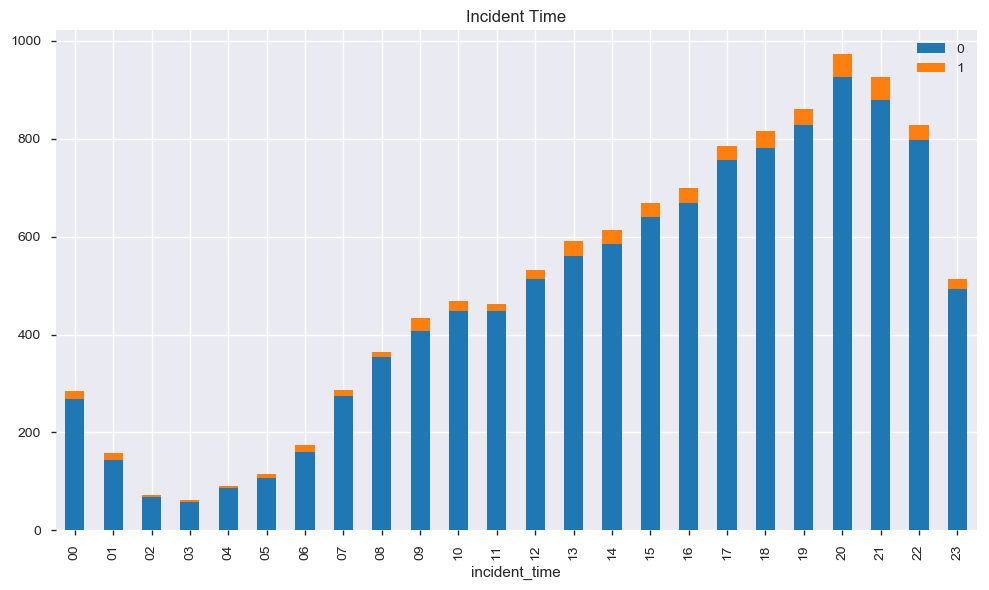

In [7]:
crosstable=pd.crosstab(train.incident_time,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Incident Time')
plt.tight_layout()
plt.show()

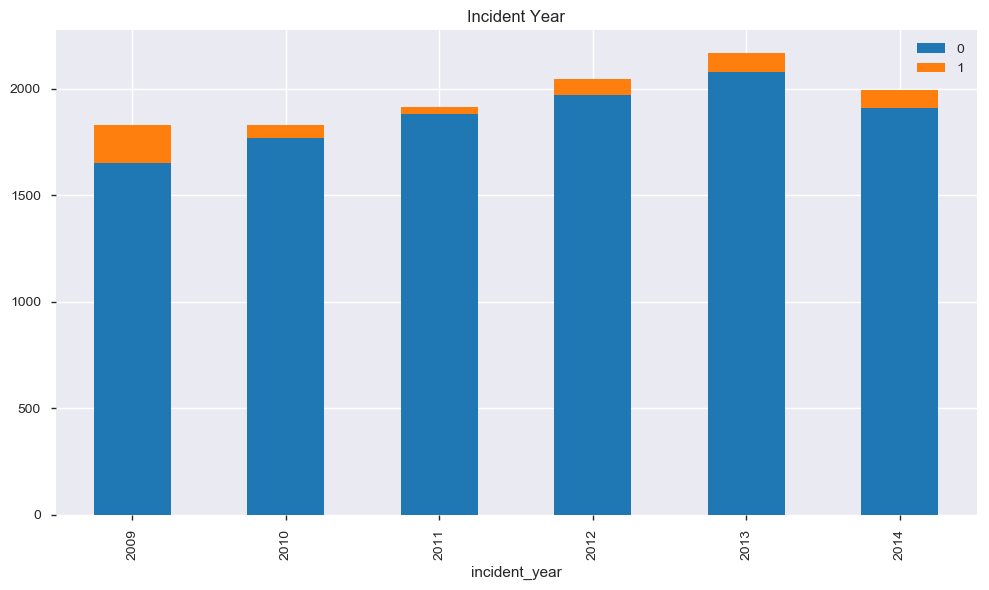

In [8]:
crosstable=pd.crosstab(train.incident_year,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Incident Year')
plt.tight_layout()
plt.show()

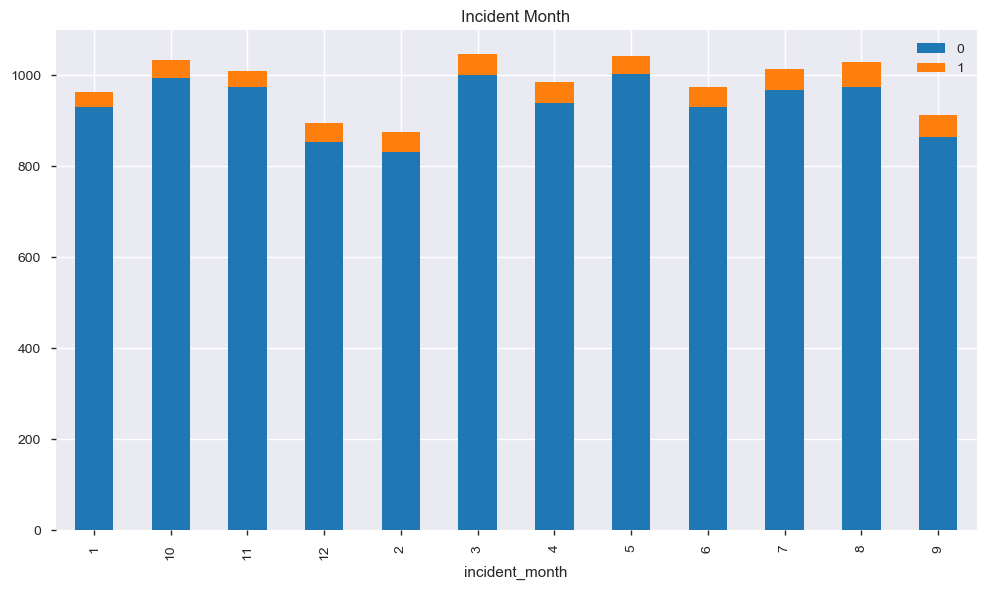

In [9]:
crosstable=pd.crosstab(train.incident_month,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Incident Month')
plt.tight_layout()
plt.show()

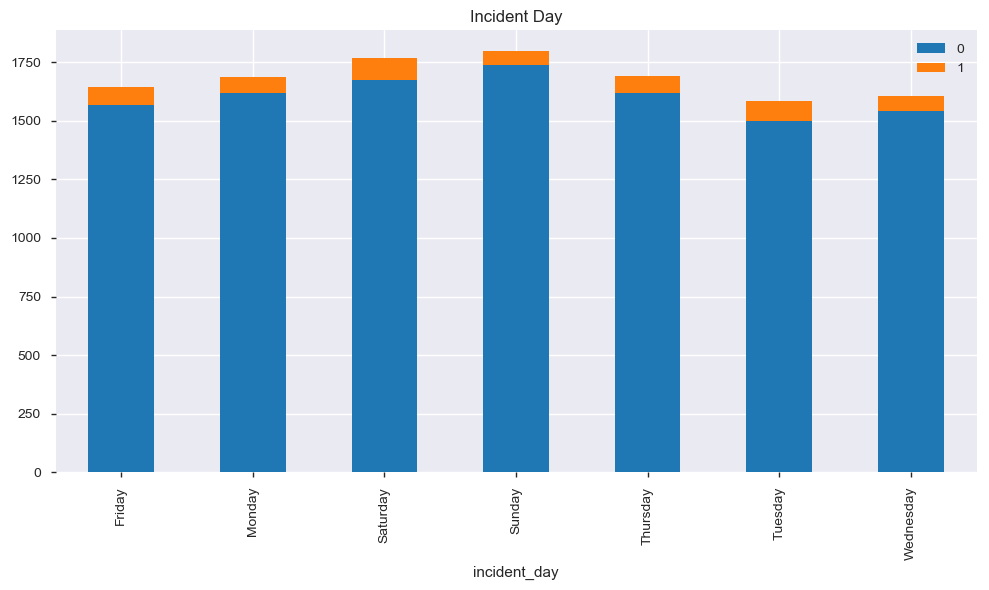

In [10]:
crosstable=pd.crosstab(train.incident_day,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Incident Day')
plt.tight_layout()
plt.show()

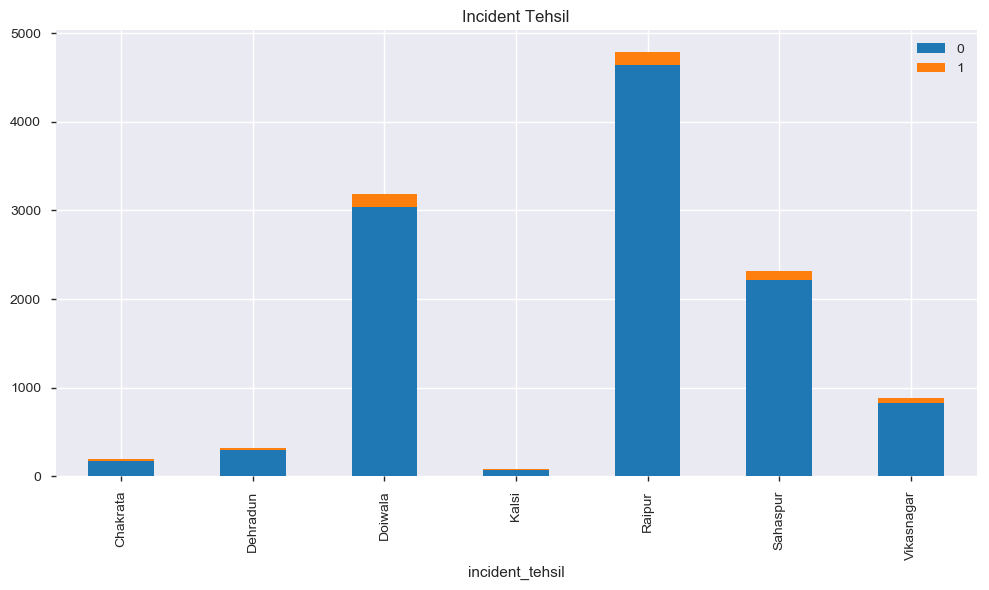

In [11]:
crosstable=pd.crosstab(train.incident_tehsil,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Incident Tehsil')
plt.tight_layout()
plt.show()

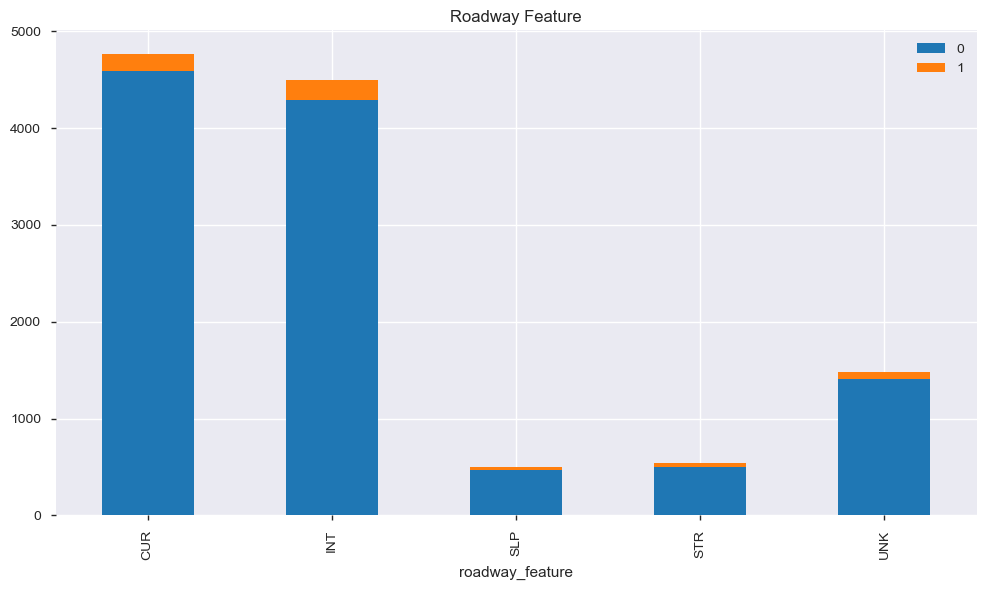

In [12]:
crosstable=pd.crosstab(train.roadway_feature,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Roadway Feature')
plt.tight_layout()
plt.show()

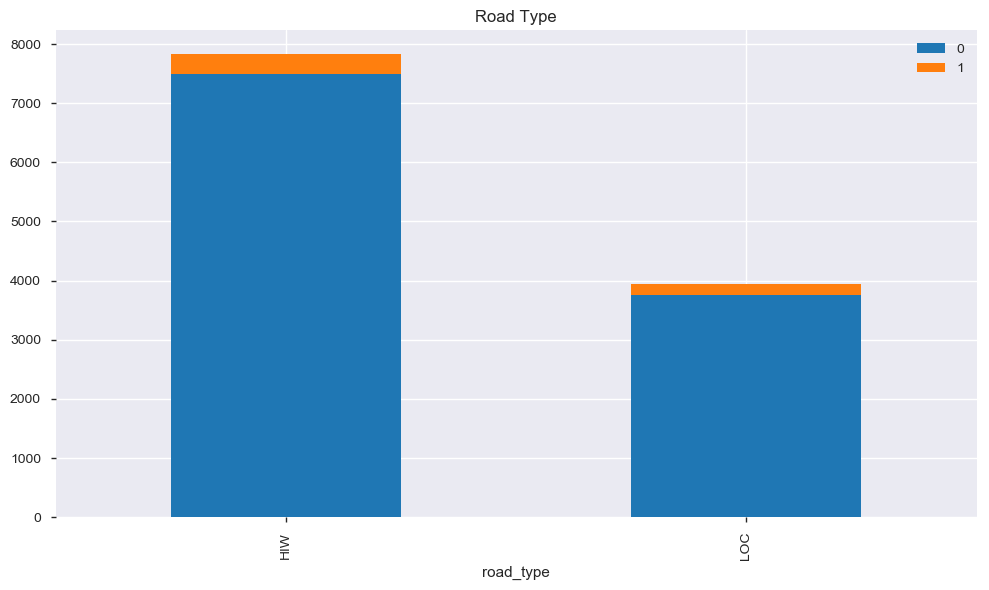

In [13]:
crosstable=pd.crosstab(train.road_type,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Road Type')
plt.tight_layout()
plt.show()

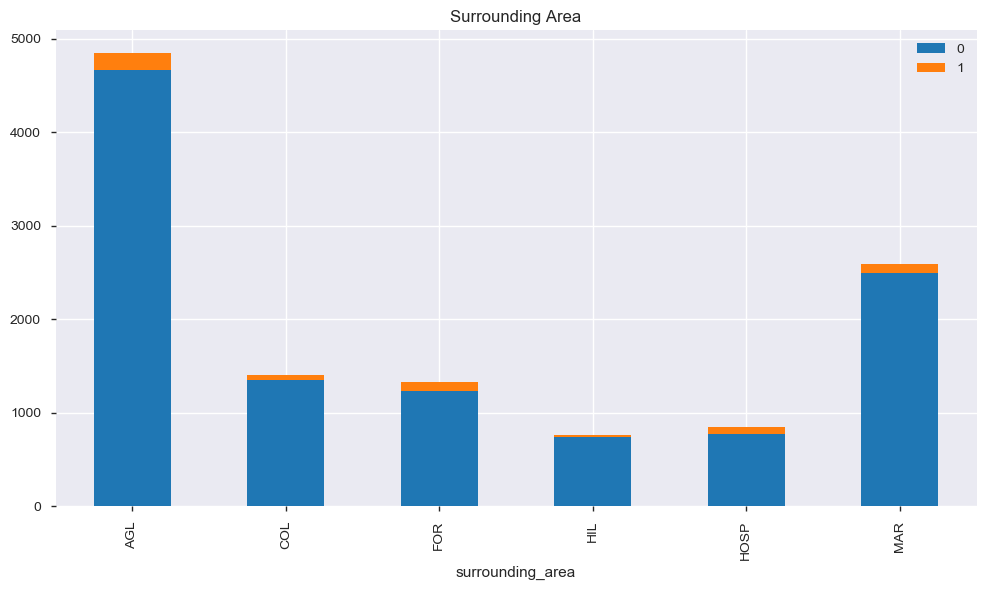

In [14]:
crosstable=pd.crosstab(train.surrounding_area,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Surrounding Area')
plt.tight_layout()
plt.show()

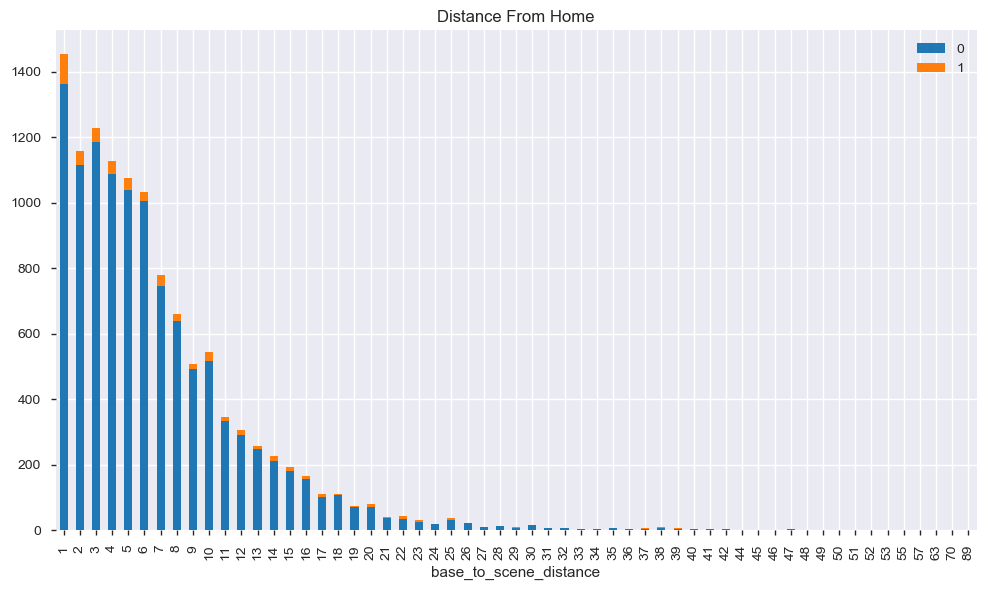

In [15]:
crosstable=pd.crosstab(train.base_to_scene_distance,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Distance From Home')
plt.tight_layout()
plt.show()

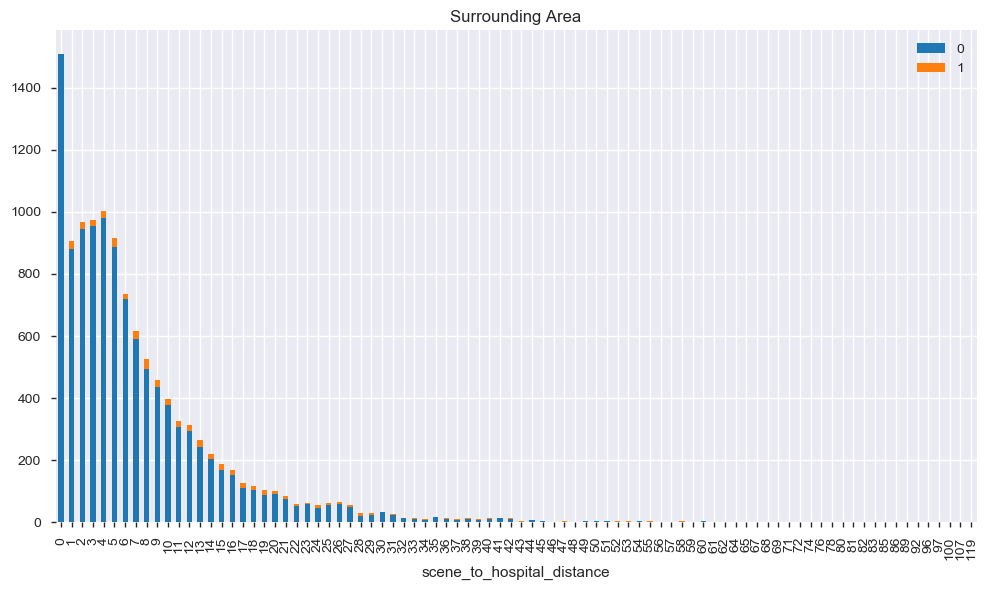

In [16]:
crosstable=pd.crosstab(train.scene_to_hospital_distance,train.criticality)
crosstable.plot(kind='bar',stacked=True,figsize=[10,6])
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Surrounding Area')
plt.tight_layout()
plt.show()

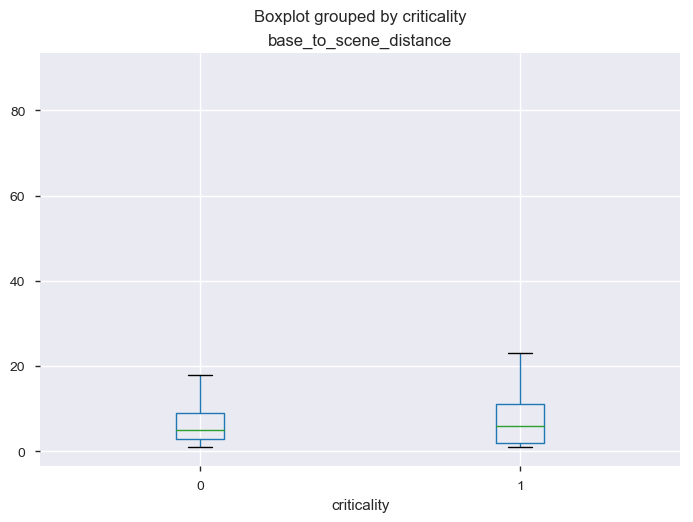

In [17]:
train.boxplot(column='base_to_scene_distance',by='criticality')

# Drop victim_id,incident_location and incident_date columns as these are now not useful in training model

In [18]:
drop_list=['victim_id','incident_location','incident_date']
train.drop(drop_list,axis=1,inplace=True)

In [19]:
train.head()

,incident_time,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_year,incident_month,incident_day
0,22,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,2012,7,Wednesday
1,20,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,2011,2,Friday
2,20,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,2009,7,Saturday
3,15,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,2012,5,Saturday
4,16,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,2010,12,Monday


# Same work with Test data

In [20]:
test.incident_time=test.incident_time.str.slice(0,2)

In [21]:
test.incident_date=pd.to_datetime(test.incident_date)
test['incident_year']=test.incident_date.dt.year.astype('str')
test['incident_month']=test.incident_date.dt.month.astype('str')
test['incident_day']=test.incident_date.dt.weekday_name

In [22]:
print(pd.unique(test.incident_tehsil).shape==pd.unique(train.incident_tehsil).shape)
print(pd.unique(test.roadway_feature).shape==pd.unique(train.roadway_feature).shape)
print(pd.unique(test.cause_of_emergency).shape==pd.unique(train.cause_of_emergency).shape)
print(pd.unique(test.road_type).shape==pd.unique(train.road_type).shape)
print(pd.unique(test.surrounding_area).shape==pd.unique(train.surrounding_area).shape)
print(pd.unique(test.incident_day).shape==pd.unique(train.incident_day).shape)

True
True
True
True
True
True


# Drop victim_id,incident_location and incident_date columns

In [23]:
drop_list=['victim_id','incident_location','incident_date']
test.drop(drop_list,axis=1,inplace=True)

In [24]:
test.head()

,incident_time,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,incident_year,incident_month,incident_day
0,15,Sahaspur,MVC - Pedestrian (Run Over/Hit & Run),23,27,INT,LOC,MAR,2010,5,Wednesday
1,16,Doiwala,Multiple Vehicular Incident,5,21,CUR,HIW,AGL,2012,3,Sunday
2,18,Raipur,Multiple Vehicular Incident,3,1,CUR,HIW,AGL,2013,4,Monday
3,16,Sahaspur,Multiple Vehicular Incident,18,14,UNK,LOC,AGL,2014,5,Saturday
4,15,Vikasnagar,2 Wheeler accidents,6,10,INT,LOC,MAR,2009,8,Wednesday


# Convert Categorical variables in dummies

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Improving imbalanced training data
## by balancing criticality data 

In [ ]:
new_train_0=train[train.criticality==0]
new_train_1=train[train.criticality==1]
for i in range(new_train_0.shape[0]):
    new_train_0[i]=new_train_0.iloc[i]
    i=i+5;


In [ ]:
train=new_train_0.append(new_train_1).sort_index()

In [ ]:
train.criticality.sum(),train.criticality.shape

# Avoid dummy trap

In [ ]:
train.columns.tolist()

In [ ]:
drop_list=['incident_tehsil_Vikasnagar','cause_of_emergency_Vehicle role over/Skid','roadway_feature_UNK','road_type_LOC','surrounding_area_MAR','incident_year_2014','incident_month_9','incident_day_Wednesday','incident_time_23']
train.drop(drop_list,axis=1,inplace=True)
test.drop(drop_list,axis=1,inplace=True)

In [ ]:
train.shape,test.shape

# Cross validation and Fitting Model

In [ ]:
X=train.drop('criticality',axis=1)
y=train.criticality

In [ ]:
for i in range(X.shape[1]):
    if list(X)[i]!=list(test)[i]:
        print(i)
    else:
        pass

In [ ]:
X=X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=.15,random_state=0)

In [ ]:
y_validation.sum()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_validation)

# Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred)

In [ ]:
cm

In [ ]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])
accuracy

# Test

In [ ]:
X_test =sc.transform(test)

In [ ]:
y_test = classifier.predict(X_test)

In [ ]:
y_test=pd.DataFrame(data=y_test,columns=["criticality"])

In [ ]:
prediction = pd.concat([pd.read_csv('test_data.csv').victim_id,y_test],axis=1)

In [ ]:
prediction.to_csv('submission.csv',index=False)